## <div dir=rtl>
<b><p align="justify"><font face = "IRLotus" size = "5">
ترسیم تقریب فازی از تابع اصلی و میزان خطای آن در سوال ۵-۱۰ (تابع تعلق مثلثی)
</font><br />
</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.filterwarnings('ignore')

alpha = 0
beta = 1
x1 = np.arange(alpha, beta, 0.001)
x2 = np.arange(alpha, beta, 0.001)
x3 = np.arange(alpha, beta, 0.001)

g_dot_x1 = 1 + x2 + x3 + x2 * x3
g_dot_x2 = 1 + x1 + x3 + x1 * x3
g_dot_x3 = 1 + x1 + x2 + x1 * x2

norm_g_dot_x1 = np.linalg.norm(g_dot_x1, np.inf)
norm_g_dot_x2 = np.linalg.norm(g_dot_x2, np.inf)
norm_g_dot_x3 = np.linalg.norm(g_dot_x3, np.inf)

h = 0.004
N = 251

g_bar = np.zeros((N * N * N, 1))
e_i1 = np.zeros((N, 1))
e_i2 = np.zeros((N, 1))
e_i3 = np.zeros((N, 1))

x1, x2, x3 = np.meshgrid(x1, x2, x3)

num = 0
den = 0
k = 0


def trimf(x, abc):
    return np.fmax(np.fmin((x - abc[0]) / (abc[1] - abc[0]), (abc[2] - x) / (abc[2] - abc[1])), 0)


for i1 in range(1, N):
    for i2 in range(1, N):
        for i3 in range(1, N):
            e_i1[i1 - 1, 0] = -1 + h * (i1 - 1)
            e_i2[i2 - 1, 0] = -1 + h * (i2 - 1)
            e_i3[i3 - 1, 0] = -1 + h * (i3 - 1)
            if i1 == 1:
                mu_A_x1 = trimf(x1, [-1, -1, -1 + h])
            elif i1 == N:
                mu_A_x1 = trimf(x1, [1 - h, 1, 1])
            else:
                mu_A_x1 = trimf(x1, [-1 + h * (i1 - 2), -1 + h * (i1 - 1), -1 + h * (i1)])

            if i2 == 1:
                mu_A_x2 = trimf(x2, [-1, -1, -1 + h])
            elif i2 == N:
                mu_A_x2 = trimf(x2, [1 - h, 1, 1])
            else:
                mu_A_x2 = trimf(x2, [-1 + h * (i2 - 2), -1 + h * (i2 - 1), -1 + h * (i2)])

            if i3 == 1:
                mu_A_x3 = trimf(x3, [-1, -1, -1 + h])
            elif i3 == N:
                mu_A_x3 = trimf(x3, [1 - h, 1, 1])
            else:
                mu_A_x3 = trimf(x3, [-1 + h * (i3 - 2), -1 + h * (i3 - 1), -1 + h * (i3)])
                
            mu_A = mu_A_x1 * mu_A_x2 * mu_A_x3
            mu_A = np.reshape(mu_A, (N * N * N, 1))
            g_bar[k, 0] = np.sum(mu_A * (1 + x1 + x2 + x3 + x1 * x2 + x1 * x3 + x2 * x3 + x1 * x2 * x3)) / np.sum(mu_A)
            k = k + 1
            
            num = num + np.sum(mu_A * (1 + x1 + x2 + x3 + x1 * x2 + x1 * x3 + x2 * x3 + x1 * x2 * x3) * (e_i1[i1 - 1, 0] + e_i2[i2 - 1, 0] + e_i3[i3 - 1, 0]))
            den = den + np.sum(mu_A * (1 + x1 + x2 + x3 + x1 * x2 + x1 * x3 + x2 * x3 + x1 * x2 * x3) * (1 + x1 + x2 + x3 + x1 * x2 + x1 * x3 + x2 * x3 + x1 * x2 * x3))
            
g_x = np.reshape(g_bar, (N, N, N))
f_x = np.reshape(g_bar + num / den, (N, N, N))

fig = plt.figure(1)
plt.style.use('ggplot')
ax = fig.gca(projection='3d')
E = g_x - f_x
surf = ax.plot_surface(x1, x2, E, linewidth=0, antialiased=True)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$Error$')
plt.savefig('fuzzy10.svg')
plt.show()


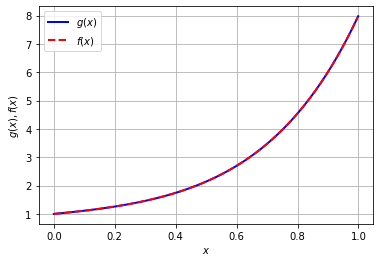

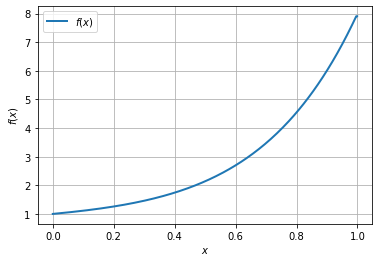

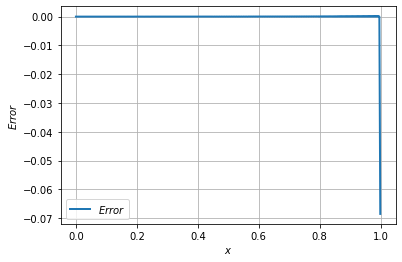

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

alpha = 0
beta = 1
x = np.arange(alpha, beta, 0.001)
h = 0.004
N = 251
g_bar = np.zeros(N)
ej = np.zeros(N)
num = 0
den = 0

def trimf(x, abc): 
    return np.fmax(np.fmin((x - abc[0]) / (abc[1] - abc[0]), (abc[2] - x) / (abc[2] - abc[1])), 0)

for j in range(1, N):   
    ej[j] = 0 + h * (j - 1)   
    if j == 1:      
        mu_A_x = trimf(x, [0, 0, 0 + h])      
    elif j == N:       
        mu_A_x = trimf(x, [1 - h, 1, 1])        
    else:      
        mu_A_x = trimf(x, [0 + h * (j - 2), 0 + h * (j - 1), 0 + h * (j)])     
    g_bar[j] = 1 + ej[j] + ej[j] ** 2 + ej[j] ** 3 + ej[j] ** 2 * ej[j] + ej[j] ** 2 * ej[j] ** 2 + ej[j] ** 3 * ej[j] + ej[j] ** 3 * ej[j] ** 2 * ej[j]    
    num = num + g_bar[j] * mu_A_x   
    den = den + mu_A_x   
f_x = num / den
g_x = 1 + x + x ** 2 + x ** 3 + x ** 2 * x + x ** 2 * x ** 2 + x ** 3 * x + x ** 3 * x ** 2 * x

plt.figure(0)
plt.plot(x, g_x, 'b-', x, f_x, 'r--', linewidth=2)
plt.xlabel('$x$')
plt.ylabel('$g(x), f(x)$')
plt.legend(['$g(x)$', '$f(x)$'])
plt.grid(True)
plt.savefig('fuzzy1.svg')

plt.figure(1)
plt.plot(x, f_x, linewidth=2)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(['$f(x)$'])
plt.grid(True)
plt.savefig('fuzzy2.svg')

plt.figure(2)
E = f_x - g_x
plt.plot(x, E, linewidth=2)
plt.xlabel('$x$')
plt.ylabel('$Error$')
plt.legend(['$Error$'])
plt.grid(True)
plt.savefig('fuzzy3.svg')
plt.show()
